In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('international-airline-passengers.csv')

In [3]:
data.head()

,Month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
int(0.7*(len(data)))

100

In [4]:
#divide into train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

In [5]:
valid.head()

,Month,passengers
100,1957-05,355
101,1957-06,422
102,1957-07,465
103,1957-08,467
104,1957-09,404


In [6]:
#preprocessing (since arima takes univariate series as input)
train.drop('Month',axis=1,inplace=True)
valid.drop('Month',axis=1,inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


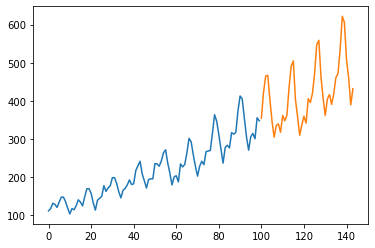

In [7]:
#plotting the data
plt.plot('passengers', data = train)
plt.plot('passengers', data = valid)

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

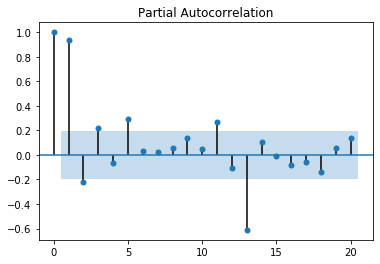

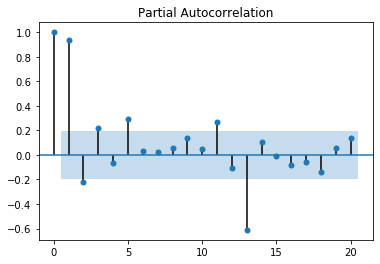

In [9]:
plot_pacf(train)

In [10]:
diff = train.diff(periods = 1)[1:] #removed NaN row
diff.head()

,passengers
1,6.0
2,14.0
3,-3.0
4,-8.0
5,14.0


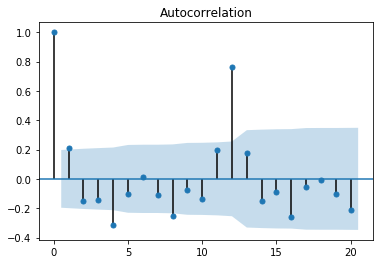

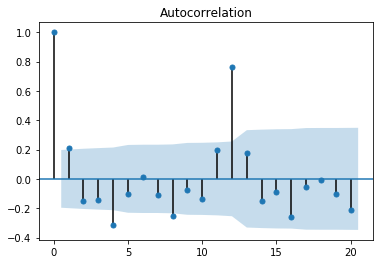

In [11]:
plot_acf(diff)

In [13]:
#building the model
from statsmodels.tsa.arima_model import ARIMA

In [14]:
train.head()

,passengers
0,112
1,118
2,132
3,129
4,121


In [63]:
model = ARIMA(train, order = (5,2,6))

In [64]:
myFit = model.fit(transparams=True)

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\mode

In [65]:
forecast = myFit.forecast(steps = len(valid))

In [66]:
forecast[0]

array([334.68799428, 367.81241021, 375.44828448, 375.59698279,
       370.17888185, 340.49785997, 335.18831777, 363.7933433 ,
       373.75524993, 371.90095435, 363.84206242, 336.00219598,
       331.88185456, 359.16606728, 369.78466347, 366.5068605 ,
       355.89873635, 329.78951384, 326.83546886, 353.00223572,
       363.94177196, 359.25837921, 346.39780613, 321.84921977,
       320.06950333, 345.26506832, 356.24379988, 350.1653379 ,
       335.32016235, 312.19848358, 311.58963917, 335.92765896,
       346.70261678, 339.23808877, 322.64985931, 300.85166828,
       301.40044839, 324.96654896, 335.32781422, 326.48644135,
       308.3740326 , 287.82060006, 289.50554032, 312.36120204])

In [67]:
forecast_1 = pd.DataFrame(forecast[0],index = valid.index,columns=['Prediction'])

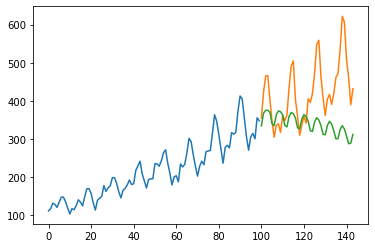

In [68]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast_1, label='Prediction')
plt.show()

In [59]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast_1))
print(rms)

67.95201953838966


In [22]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
mape = mean_absolute_percentage_error(valid,forecast_1)
mape

11.777208653269545

In [24]:
accuracy = 100 - mape
accuracy

88.22279134673046